In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
def shape_print (X_train,X_test,y_train,y_test):
    list = [X_train,X_test,y_train,y_test]
    list1 = ['X_train','X_test','y_train','y_test']
    for i,j in zip(list,list1):
        print(f'{j} : {i.shape}')

In [4]:
shape_print(X_train,X_test,y_train,y_test)

X_train : (60000, 28, 28)
X_test : (10000, 28, 28)
y_train : (60000,)
y_test : (10000,)


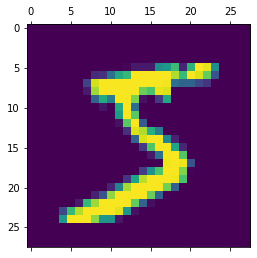

In [5]:
plt.matshow(X_train[0])

In [6]:
y_train[0]

5

In [7]:
np.unique(y_train, return_counts=True) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [8]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

In [9]:
def plot_sample(X,y, index):
    plt.figure(figsize = (10,1))
    plt.imshow(X[index])
    plt.xlabel(y[index])

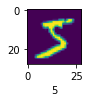

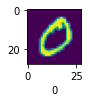

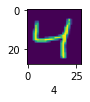

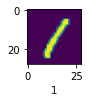

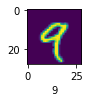

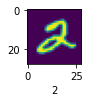

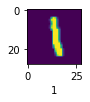

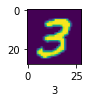

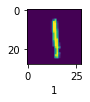

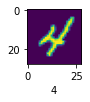

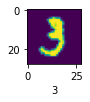

In [10]:
for i in range(11):
    plot_sample (X_train,y_train,i)

In [11]:
X_train.max()

255

In [12]:
X_test.max()

255

In [13]:
X_train= X_train/X_train.max() #Bringing data between 0 and 1
X_test = X_test/X_test.max()

In [14]:
mnist_ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

mnist_ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mnist_ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.6523 - accuracy: 0.8345
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3371 - accuracy: 0.9063
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2891 - accuracy: 0.9186
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2593 - accuracy: 0.9273
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2369 - accuracy: 0.9335
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2182 - accuracy: 0.9383
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2027 - accuracy: 0.9425
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1890 - accuracy: 0.9467
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1771 - accuracy: 0.9499
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.166

In [15]:
mnist_ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1596 - accuracy: 0.9534


[0.15958712995052338, 0.9534000158309937]

In [16]:
y_pred = mnist_ann.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_pred.shape

(10000, 10)

In [18]:
y_test.shape

(10000,)

In [19]:
y_pred_classes = [np.argmax(i) for i in y_pred]

In [20]:
y_pred_classes[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [21]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [22]:
y_test.ndim

1

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.96      0.95      1032
           3       0.94      0.95      0.95      1010
           4       0.95      0.95      0.95       982
           5       0.96      0.92      0.94       892
           6       0.95      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.94      0.94       974
           9       0.94      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



Text(69.0, 0.5, 'True')

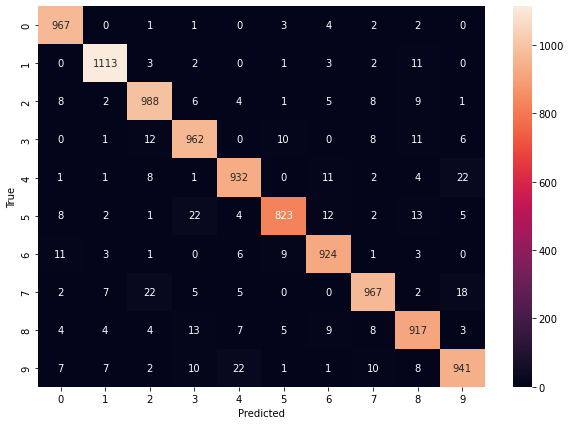

In [24]:
cm= tf.math.confusion_matrix(y_test,y_pred_classes)
import seaborn as sn
plt.figure (figsize =(10,7))
sn.heatmap(cm, annot = True,fmt = "d" )
plt.xlabel("Predicted")
plt.ylabel("True")

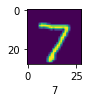

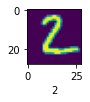

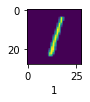

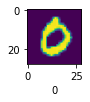

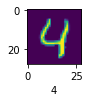

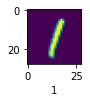

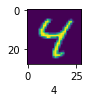

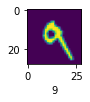

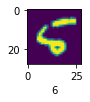

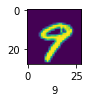

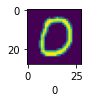

In [25]:
for i in range(11):
    plot_sample (X_test,y_pred_classes,i)

## Predicting using CNN

In [27]:
#     filters denote number of different patterns to detect. 
#     It figures out on its own just like a loopy circle in number 9, straight line or a diagonal line, curves edges etc.
#     kernel_size denotes the grid size for creating partterns. Can be any number 3x3 4x4 etc
#     Max pooling and average pooling are the two popular methods. 
#     In max pooling of (2,2) from a grid of 2x2 a max and adds to a mapping.

In [30]:
X_train.shape

(60000, 28, 28)

In [38]:
X_train[0][7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.19215686, 0.93333333, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.98431373, 0.36470588, 0.32156863,
       0.32156863, 0.21960784, 0.15294118, 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [28]:
mnist_cnn = models.Sequential ([
    
    layers.Conv2D(filters = 32, kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)), 
    # ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. 
    # Full shape received: (None, 28, 28)
    # (28,28,1) 1 needs to be specified here for input_shape which stands for min_ndim=4 4th dimension of single color grade.
    layers.MaxPooling2D((2,2)),  

    layers.Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation ='relu'),
    layers.Dense(10,activation = 'softmax')
    ])

mnist_cnn.compile (optimizer= 'adam',
          loss = 'sparse_categorical_crossentropy',
          metrics = ['accuracy'])

mnist_cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 66s 34ms/step - loss: 0.1398 - accuracy: 0.9577
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0455 - accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0307 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0228 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0174 - accuracy: 0.9942
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0130 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0102 - accuracy: 0.9967
Epoch 8/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0099 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0075 - accuracy: 0.9976
Epoch 10/10
1875/1875 [==============================] - 78s 42m

In [29]:
mnist_cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0333 - accuracy: 0.9917


[0.033282097429037094, 0.9916999936103821]

In [39]:
cnn_y_pred = mnist_cnn.predict(X_test)

313/313 [==============================] - 4s 11ms/step


In [40]:
cnn_y_pred.shape

(10000, 10)

In [41]:
y_test.shape

(10000,)

In [42]:
cnn_y_pred_classes = [np.argmax(i) for i in cnn_y_pred]

In [45]:
cnn_y_pred_classes[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [46]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test,cnn_y_pred_classes))
# Support has a little imbalance. Try to balance it later.

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Text(69.0, 0.5, 'True')

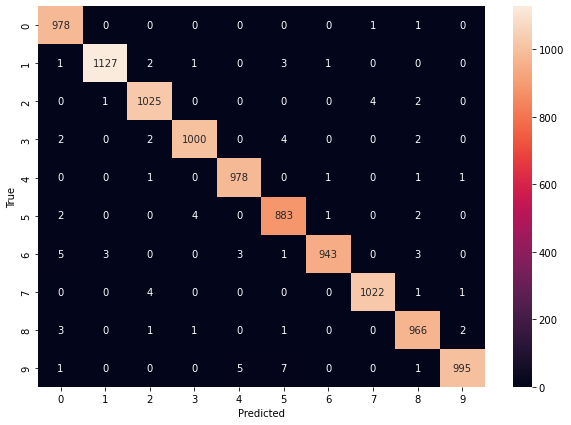

In [48]:
cm= tf.math.confusion_matrix(y_test,cnn_y_pred_classes)
import seaborn as sn
plt.figure (figsize =(10,7))
sn.heatmap(cm, annot = True,fmt = "d" )
plt.xlabel("Predicted")
plt.ylabel("True")

## Results Comparison (ANN and CNN):
    

__Evaluating for accuracy :__

In [49]:
mnist_ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1596 - accuracy: 0.9534


[0.15958712995052338, 0.9534000158309937]

In [50]:
mnist_cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.0333 - accuracy: 0.9917


[0.033282097429037094, 0.9916999936103821]

__Evaluating for f1,prec,rec :__

In [51]:
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.96      0.95      1032
           3       0.94      0.95      0.95      1010
           4       0.95      0.95      0.95       982
           5       0.96      0.92      0.94       892
           6       0.95      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.94      0.94       974
           9       0.94      0.93      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In [52]:
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test,cnn_y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



__Evaluating Confusion Matrix :__

Text(42.0, 0.5, 'True')

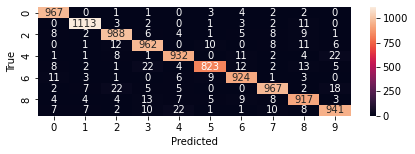

In [66]:
cm= tf.math.confusion_matrix(y_test,y_pred_classes)
import seaborn as sn
plt.figure (figsize =(7,2))
sn.heatmap(cm, annot = True,fmt = "d" )
plt.xlabel("Predicted")
plt.ylabel("True")

Text(42.0, 0.5, 'True')

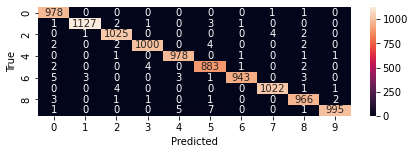

In [65]:
cm= tf.math.confusion_matrix(y_test,cnn_y_pred_classes)
import seaborn as sn
plt.figure (figsize =(7,2))
sn.heatmap(cm, annot = True,fmt = "d" )
plt.xlabel("Predicted")
plt.ylabel("True")

__We can conclude that CNN performed better than ANN in each aspect.__